## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("adverts.csv")

In [3]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [9]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


## Data cleaning

In [54]:
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
# lets drop missing values as well as working with samples of the dataset due to runtime
df.dropna(inplace=True)

In [57]:
# taking sample of data
df = df.sample(frac=0.02)

In [58]:
#checking if change has been applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7268 entries, 93546 to 372690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       7268 non-null   int64  
 1   mileage                7268 non-null   float64
 2   reg_code               7268 non-null   object 
 3   standard_colour        7268 non-null   object 
 4   standard_make          7268 non-null   object 
 5   standard_model         7268 non-null   object 
 6   vehicle_condition      7268 non-null   object 
 7   year_of_registration   7268 non-null   float64
 8   price                  7268 non-null   int64  
 9   body_type              7268 non-null   object 
 10  crossover_car_and_van  7268 non-null   bool   
 11  fuel_type              7268 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 688.5+ KB


In [59]:
# public reference and reg_code column is not really needed so lets remove it from the dataset
df.drop(['public_reference', 'reg_code'], axis=1, inplace=True)

- Lets take a look at crossover_car_and_van column and see how many uniques values are there since it seems to be more populated with **False**

In [60]:
df['crossover_car_and_van'].unique()

array([False,  True])

- Lets update some of the columns datatype

In [61]:
df['price'] = df['price'].astype('float')

df['year_of_registration'] = df['year_of_registration'].astype('int')

## Analysis


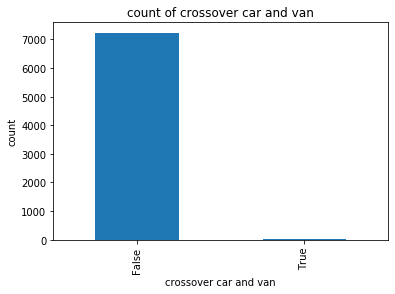

In [62]:
df['crossover_car_and_van'].value_counts().plot(kind='bar');
plt.title('count of crossover car and van');
plt.xlabel('crossover car and van')
plt.ylabel('count');

Most of the cars listed here are not crossover car and van

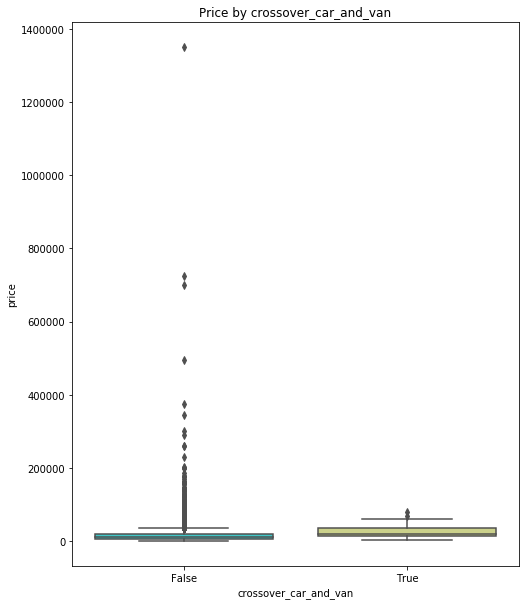

In [63]:
plt.figure(figsize=(8,10))
sns.boxplot(x='crossover_car_and_van', y='price',data=df, palette='rainbow');
plt.title("Price by crossover_car_and_van");

Despite most of the cars not being cross over van, but an average crossover car and van have more influence in the price of car. 

#### Let us look at those cars that their prices fall out of range

In [64]:
# getting oulier price
out_price = df[df['price'] > 79500]

In [65]:
# function to plot top 10 items 
def top_ten(df, column, t, x_label, y_label):
    df[column].value_counts()[:10].plot(kind='bar');
    plt.title(t);
    plt.xlabel(x_label)
    plt.ylabel(y_label);

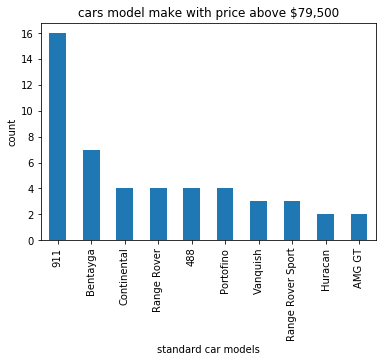

In [66]:
top_ten(out_price, 'standard_model', 'cars model make with price above $79,500',
       'standard car models', 'count')

The above plot shows list of top 10 car models with price greater that 79,500 dollars with 911 being the most listed. These cars models causes the ouliers we see in car prices but we can't just take them out since they are valid in car deals.

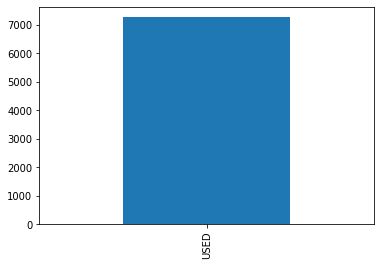

In [67]:
#Lets take a look at vehicles condition

df['vehicle_condition'].value_counts().plot(kind='bar')

 **USED** cars are the only vehicle condition  we have on our dataset.

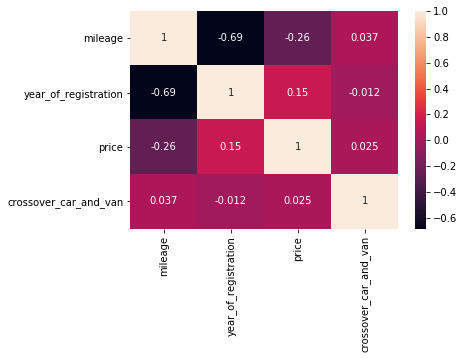

In [69]:
# Lets look at correlation of columns amongs themselves
sns.heatmap(df.corr(), annot=True)

From the above plot, we can see that mileage and price have negative correlation which makes sense considering that we are working dataset containing used cars. For example, the cheaper the price of an automobile, the higher the mileage.

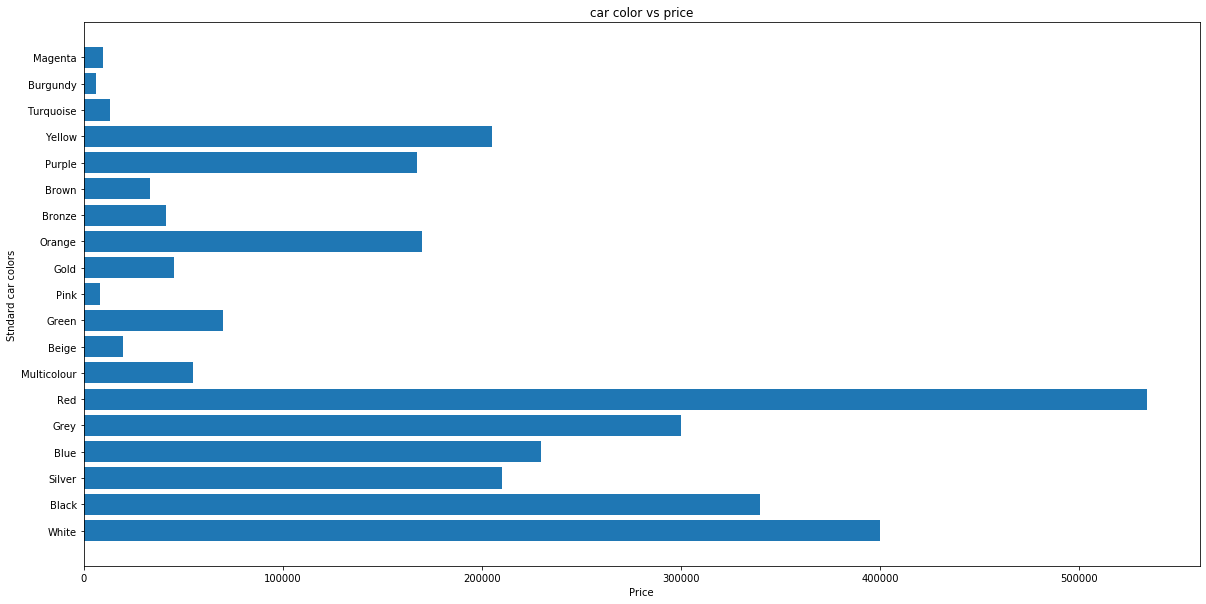

In [17]:
plt.figure(figsize=[20,10])
plt.barh(df['standard_colour'], df['price']);
plt.title('car color vs price');
plt.xlabel('Price')
plt.ylabel('Stndard car colors');

from our sample, Red cars are the most listed followed by white and black.

In [70]:
# lets take a look at red color cars

red_cars = df[df['standard_colour'] == 'Red']

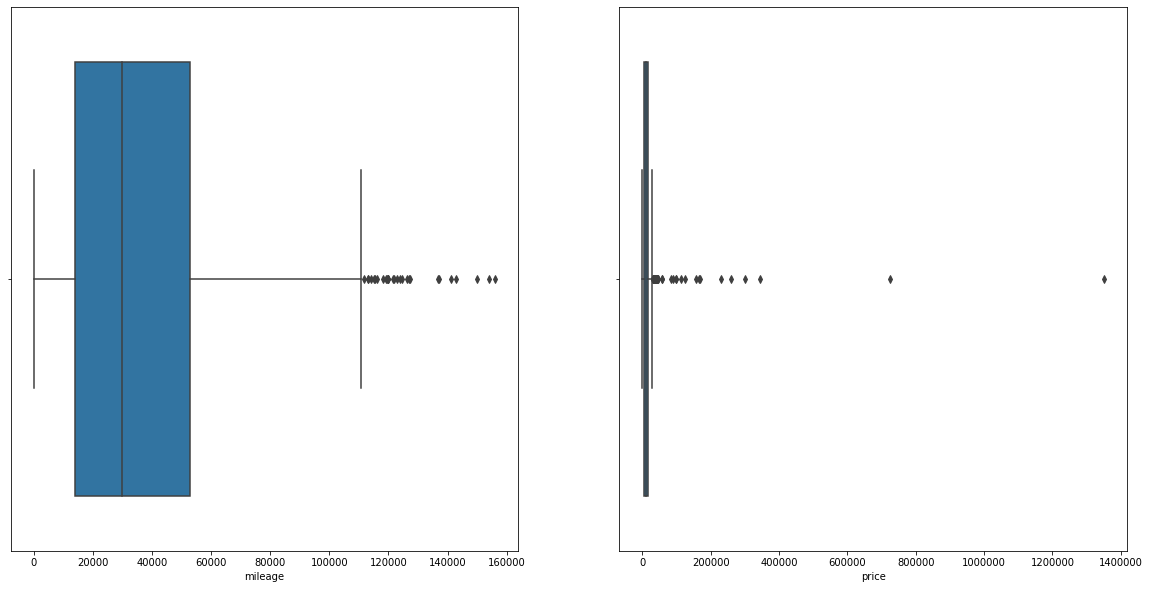

In [71]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sns.boxplot(red_cars['mileage']);

plt.subplot(1,2,2)
sns.boxplot(red_cars['price']);

On average, red cars have a mileage of 35662.94 though we still have some red cars with mileage above 125000. The maximum amount for a red car is 534,000 dollars but the average amount of a red car is approximately  14,697 dollars.

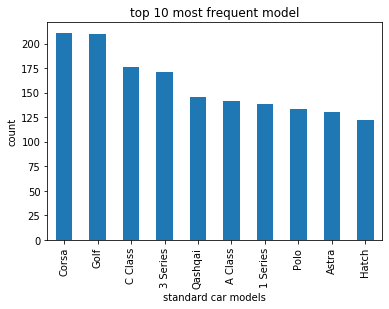

In [72]:
# most frequent car model
top_ten(df, 'standard_model', 'top 10 most frequent model',
       'standard car models', 'count')

The above graph shows the top 10 standard car models listed on the dataset with Golf being the most listed among other car models.

In [73]:
golf = df[df['standard_model'] == 'Golf']

In [74]:
golf.price.describe()

count      210.000000
mean     12602.719048
std       6916.627037
min        250.000000
25%       7495.000000
50%      12468.000000
75%      16493.750000
max      32995.000000
Name: price, dtype: float64

We can see that 50% of Golf cars are sold at the price of 13,206 dollars,  while the maximum price for a Golf car is 33,552 dollars. The lowest price listed on a Golf car is $350.

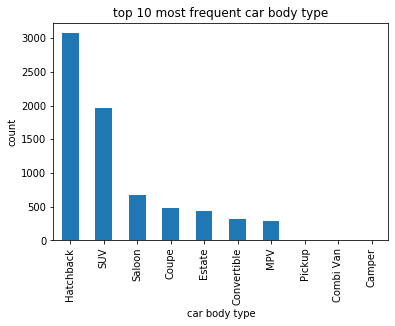

In [75]:
# lets also take a look at car body type
top_ten(df, 'body_type', 'top 10 most frequent car body type',
       'car body type', 'count')

As we can see, over 30,000 used cars listed have **Hatchback** body type followed by **SUV** which have listing of approximately 20,000 cars. Both body types are the most purchased kind of cars.

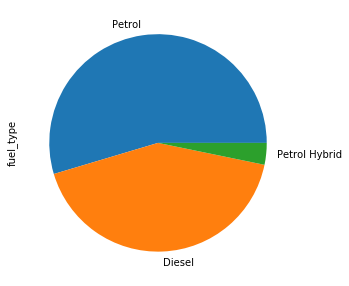

In [76]:
# Lets take a look at what fuel type is most common on the dataset
plt.figure(figsize=[10,5])
df['fuel_type'].value_counts()[:3].plot(kind='pie');

From the above graph we can see that on average, most of the cars can travel 40884.53km per litre of fuel and we can see lots of outliers in the dataset.

In [82]:
df['year_of_registration'].describe()

count    7268.000000
mean     2014.988167
std         4.442452
min      1963.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: year_of_registration, dtype: float64

In [84]:
df['year_of_registration'].unique()

array([2017, 2010, 2019, 2020, 2011, 2013, 2018, 2015, 2016, 2012, 2002,
       2009, 2014, 2004, 2005, 2008, 2007, 2003, 2006, 1999, 1989, 2001,
       1963, 1994, 1998, 1993, 2000, 1992, 1996, 1991, 1982, 1979, 1971,
       1997, 1968, 1973, 1990, 1972, 1970])

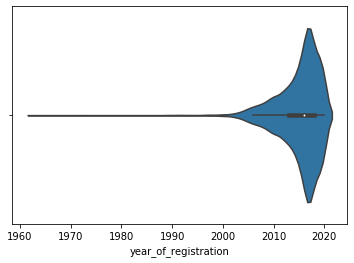

In [90]:
sns.violinplot(df['year_of_registration']);

cars on the dataset have year of registration ranging from 1963 to 2020 and majority of used cars were  listed between 2010 and 2020.

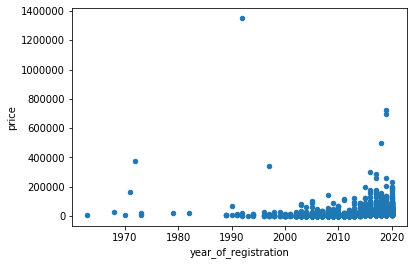

In [93]:
df.plot(x="year_of_registration", y="price", kind="scatter");

We can see that most cars between 1990 and 2020 have price below $200,000